<a href="https://colab.research.google.com/github/Gm-shuvo/AI_Lab/blob/main/Dropout_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
file_path = '/content/drive/My Drive/hero/sonar_dataset.csv'
df = pd.read_csv(file_path, header = None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [23]:
df.shape

(208, 61)

In [24]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [35]:
#X valuse

X = df.drop(60, axis = 1) #axis= 1 means columns
y = df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [39]:
#hot encoding y
y = pd.get_dummies(y,drop_first = True) #R-->1 and M-->0
y.sample(5)

,R
149,0
54,1
120,0
164,0
35,1


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [46]:
X_train.shape

(156, 60)

In [47]:
X_test.shape

(52, 60)

Model without Dropout Layer

In [54]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dense(25, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')

])

In [55]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [57]:
model.fit(X_train, y_train, epochs= 100, batch_size=32)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.8462
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.8333
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.8526
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8590
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8333
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.8526
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8782
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8462
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8526
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3945 - accuracy: 0.8782
Epoch 11/100
5/5 [===========

In [59]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.9663 - accuracy: 0.7692


[0.9663029909133911, 0.7692307829856873]

In [64]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:5])
y_pred = np.round(y_pred)
print(y_pred[:5])

2/2 [==============================] - 0s 7ms/step
[2.3853729e-06 9.4340533e-01 7.0290166e-01 1.4822620e-04 9.9976802e-01]
[0. 1. 1. 0. 1.]


In [65]:
y_test[:5]

,R
186,0
155,0
165,0
200,0
58,1


In [67]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.84      0.64      0.73        25

    accuracy                           0.77        52
   macro avg       0.78      0.76      0.76        52
weighted avg       0.78      0.77      0.77        52

[[24  3]
 [ 9 16]]


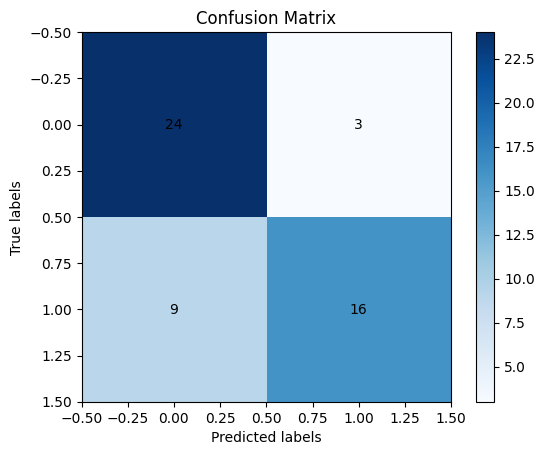

In [84]:
cm = confusion_matrix(y_test, y_pred)
def conPlt(cm):
  plt.imshow(cm, cmap=plt.cm.Blues)

  # add axis labels and a title
  plt.xlabel("Predicted labels")
  plt.ylabel("True labels")
  plt.title("Confusion Matrix")

  # add a color bar
  plt.colorbar()

  # add text annotations for each cell
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j, i, cm[i, j], ha="center", va="center")

  # show the plot
  plt.show()
conPlt(cm)

Model with Dropout Layer







In [74]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(25, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')

])

In [77]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size= 32, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.6969 - accuracy: 0.5256
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.4679
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5192
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7072 - accuracy: 0.4936
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5641
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5385
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5577
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5256
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5449
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5385
Epoch 11/100
5/5 [===========

In [78]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4230 - accuracy: 0.8077


[0.4230231046676636, 0.807692289352417]

In [82]:
Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred)
Y_pred[:5].reshape(-1)

2/2 [==============================] - 0s 4ms/step


array([0., 1., 1., 0., 1.], dtype=float32)

In [83]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.83      0.76      0.79        25

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52



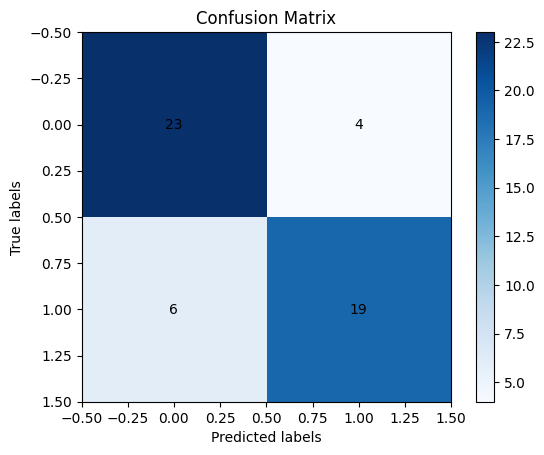

In [85]:
cm = confusion_matrix(y_test, Y_pred)
conPlt(cm)
